# Undersøk korpus med metadata

Notebook for å undersøke korpus med metadata.

En viktig metode i undersøkelse av metadata og tekster er grafer og nettverk. 

* [Wikipedia](


In [3]:
import dhlab.module_update as mu
import dhlab.nbtext as nb
import dhlab.token_map as tm
import dhlab.graph_networkx_louvain as gnl

In [4]:
mu.css()

Bygg et korpus, en samling bøker basert på dewey - vi skal prøve samme øvelse også med emneord

In [5]:
bøker = nb.book_corpus(
    period=(1950, 2010),
    subject='krig', limit=300)

In [6]:
bøker

,urn,author,title,year
0,2013091905073,"Fretheim, Tor",Langsom trio,1994
1,2011092106111,"Gleitzman, Morris",gang,2010
2,2013010705092,,Krig og moral,1987
3,2009122100069,,Krigføring i middelalderen,2003
4,2014070108017,"Helgesen, Vidar",Til krig for menneskerettighetene,1999
5,2007072701010,"Rosen, Carl Gustaf von",Biafra,1969
6,2013060608178,,War children of the world,2003
7,2015091148070,"Ritland, Kåre N.",Merket skal standa om mannen han stupa,1995
8,2007042001010,"Waage, Johan",Kampene om Narvik,1961
9,2011032208128,,Antikke samfunn i krig og fred,2003


## Undersøk forskjeller

Her samler vi sammen alle bøkene i korpus og summerer. Men først la oss se på en del av korpuset som en dokument term matrise

In [7]:
# tar de fem første og henter frekvensene for alle bøkene

bøker_dtm = nb.get_corpus_text(nb.pure_urn(bøker)[:5])

In [8]:
bøker_dtm

,2013091905073,2011092106111,2013010705092,2009122100069,2014070108017
.,6444.0,3002.0,6217.0,2602.0,2633.0
",",2075.0,1157.0,4162.0,3092.0,2388.0
ikke,1626.0,509.0,366.0,242.0,539.0
det,1534.0,531.0,1358.0,692.0,892.0
han,1461.0,281.0,136.0,246.0,20.0
var,1407.0,101.0,1181.0,696.0,401.0
på,1338.0,636.0,960.0,615.0,362.0
å,1054.0,650.0,446.0,506.0,697.0
og,1044.0,1099.0,1225.0,1348.0,1129.0
i,1015.0,594.0,2980.0,1702.0,1430.0


Et varmekart gjør det enklere å spotte likhet og variasjon i tallene.

In [9]:
nb.heatmap(bøker_dtm.head(50), color='#045599')

,2013091905073,2011092106111,2013010705092,2009122100069,2014070108017
.,6444,3002,6217,2602,2633
",",2075,1157,4162,3092,2388
ikke,1626,509,366,242,539
det,1534,531,1358,692,892
han,1461,281,136,246,20
var,1407,101,1181,696,401
på,1338,636,960,615,362
å,1054,650,446,506,697
og,1044,1099,1225,1348,1129
i,1015,594,2980,1702,1430


Tre hundre bøker tar en tid å laste ned og telle opp lokalt så vi teller på server med passende kommando:

In [10]:
bøker_agg = nb.aggregate_urns(nb.pure_urn(bøker))

Så konverteres listen over ord og tall til en dataramme

In [11]:
bøker_df = nb.frame_sort(nb.frame(bøker_agg, 'count'))

For referanse henter vi ut de 50000 mest frekvente ordene i bokhylla.

In [12]:
totals = nb.frame(nb.totals(50000), 'tot')

Sånn ser frekvensene ut for bøkene

In [13]:
bøker_df.head(20)

,count
.,1095431
",",991345
og,508595
i,482140
som,280196
til,264528
av,261766
det,253446
en,222886
å,222770


.. og sånn for bokhylla

In [14]:
totals.head(20)

,tot
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583
som,265144740
til,254500136
er,248764786
av,235180661
en,231631623


Vi finner forskjellen ved å dividere den ene på den andre:

In [15]:
forskjell = bøker_df['count']/totals['tot']

Tallene må sorteres, de høyeste tolkes til å være de mest relevante

In [16]:
bøker_typiske_ord = nb.frame_sort(nb.frame(forskjell, 'ratio'))
bøker_typiske_ord.head(50)

,ratio
Bornholm,0.052682
kriget,0.049286
israelske,0.048249
Sikkerhetsrådet,0.046825
kp,0.042585
Saddam,0.042182
Bosnia,0.042178
weapons,0.041489
krigføring,0.041439
Milorg,0.041169


Som ordsky

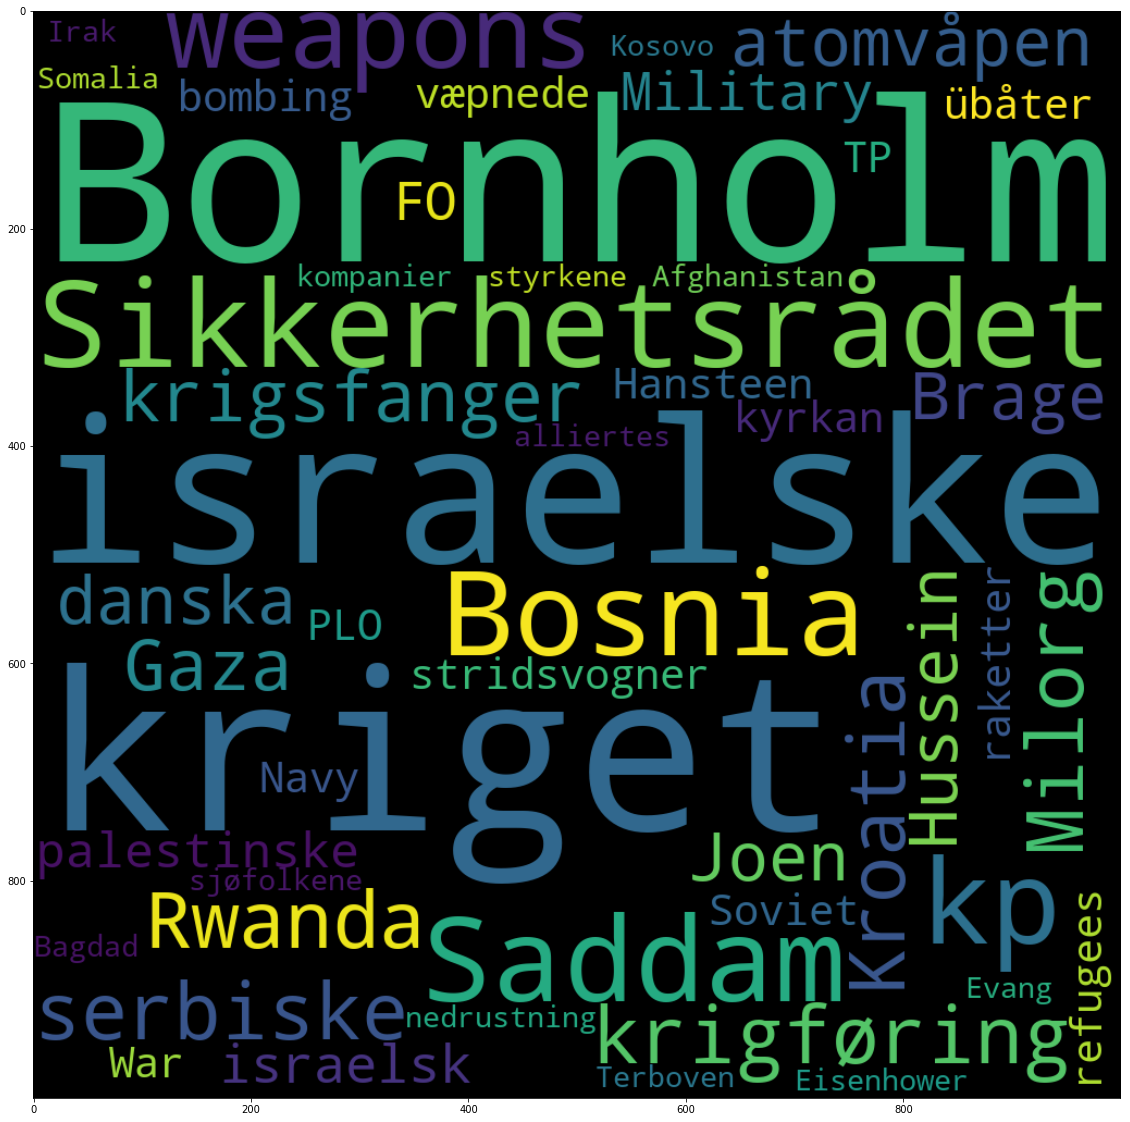

In [17]:
nb.cloud(bøker_typiske_ord.head(50))

# Metadata for korpuset kan raskt sjekkes

Pass på at ikke korpuset er for stort (mange tusen).

In [18]:
nb.frame(nb.metadata(nb.pure_urn(bøker)), 'urn forfatter år tittel subtittel forlag sjanger sesamid språk'.split())

,urn,forfatter,år,tittel,subtittel,forlag,sjanger,sesamid,språk,9
0,2013091905073,"Fretheim, Tor",1994,Langsom trio,,Gyldendal,fiction,c31aa77141d27110ba2e737de3aa4a74,nob,
1,2011092106111,"Gleitzman, Morris",2010,gang,,Gyldendal,novel,2eb73d4c12d43966fde4e6130200430a,nob,eng
2,2013010705092,,1987,Krig og moral,kriminalitet og kontroll i Norden under andre ...,Universitetsforlaget,notfiction,ec82112a57df3c3e0dd6a3995bcbbc5f,mul,
3,2009122100069,,2003,Krigføring i middelalderen,"strategi, ideologi og organisasjon ca. 1100-1400",Forsvarsmuseet,unknown,46736fa469dc408e43447181d2885317,nob,
4,2014070108017,"Helgesen, Vidar",1999,Til krig for menneskerettighetene,legaliteten etter FN-pakten av kollektiv human...,"Institutt for offentlig rett, Universitetet i ...",notfiction,0a57522089cccde4233ffe4af0eb9488,nob,
5,2007072701010,"Rosen, Carl Gustaf von",1969,Biafra,som jeg ser det,Cappelen,notfiction,10be258daf8ba1628e0d880abed7759d,nob,swe
6,2013060608178,,2003,War children of the world,,War and Children Identity Project,unknown,6421c089dca4d5513f938802d27a73cf,eng,
7,2015091148070,"Ritland, Kåre N.",1995,Merket skal standa om mannen han stupa,krigsminnesmerker i Hordaland,Natur og opplevelsesforl.,notfiction,498f75700cfce4f2c4ef09d745e9fdde,nob,
8,2007042001010,"Waage, Johan",1961,Kampene om Narvik,,Dreyer,notfiction,0f30e1169873643a8d24474c699c3577,nob,
9,2011032208128,,2003,Antikke samfunn i krig og fred,festskrift til Johan Henrik Schreiner,Novus forl.,notfiction,38d9dc6e85183b7c04ec29fe811f4327,mul,


### Søk etter sett av ord i clustret



In [19]:
nb.frame_sort(bøker_typiske_ord.loc['det sår krig . , gevær våpen generaler soldater blod fattigdom nød'.split()])

,ratio
soldater,0.013727
krig,0.012393
våpen,0.009255
generaler,0.008618
gevær,0.004241
blod,0.001205
nød,0.001180
fattigdom,0.001173
sår,0.001133
det,0.000927


In [20]:
G = nb.make_network(2007060501049,"""revolusjonen, kritikk, arbeiderklassen, virkelige, sosialistiske, revolusjon, samfunnets, herredømme, sosialisme, samfunnet, samfunn, borgerskapet, proletariatet, samfunnsmessige, teorien, herskende, kapitalen, sosialismen, materielle, demokratiske, allmenne, kapitalistiske, arbeiderne, arbeidernes, proletariatets, vesentlige, eksistens, samfunnsmessig, borgerlige, arbeiderklassens, arbeidskraft, naturen, arbeidende, revolusjonær, Frankrike, menneskets, kommunismen, menneskelig, utbytting, økonomien, klassekampen, middel, revolusjonære, nødvendighet, arbeideren, skiller, vitenskap, grunnleggende, vitenskapelig, intellektuelle, uunngåelig, produksjonsmidlene, frie, prinsipp, nasjoner, massene, absolutte, kjempe, opprør, umiddelbart, kamp, enhet, undertrykte, 1848, vitenskapen, bind, kapitalistene, allmenn, bønder, frigjøring, vitenskapelige, Paris, virkelighet, diktatur, følgelig, klassene, sosialistisk, produksjon, Marx, politikken, arbeidere, motsetningen, Kapitalen, umiddelbare, produksjonsforhold, menneskenes, produserer, Hegel, produsere, konkurransen, borgerskapets, bevissthet, grunnlaget, eiendom, frihet, kapitalister, kapitalist, slutter, religiøse, produktive, innbyrdes, tvinger, forsvinner, folkets, forvandlet, profitt, kapitalisten, organer, sosial, produksjonen, borgerskap, trinn, nasjon, massen, filosofiske, Kapitalens, arbeidets, sosialt, produktene, nødvendigheten, profitten, avskaffe, kritikken, egenskap, klassekamp, hersker, produksjonsmidler, proletariske, produktet, Lenins, proletariat, skaper, kapitalismen, fellesskap, partiet, objektive, kommunisme, lykkes, eksistere, storindustrien, kommunistene, produksjonsprosessen, slaver, bekostning, flertallet, Italia, vold, abstrakt, demokratisk, individ""".split(', '))

In [21]:
nb.central_betweenness_characters(G)

[('demokratiske', 0.21176671125644594),
 ('samfunn', 0.1961271006551108),
 ('kamp', 0.1608712077657222),
 ('partiet', 0.10043776319351767),
 ('demokratisk', 0.08667803063707484),
 ('revolusjonær', 0.0731846452615384),
 ('sosialisme', 0.07280438029485532),
 ('samfunnsmessig', 0.0700359725858359),
 ('revolusjonære', 0.0674184995601653),
 ('diktatur', 0.05641945501763369)]

D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


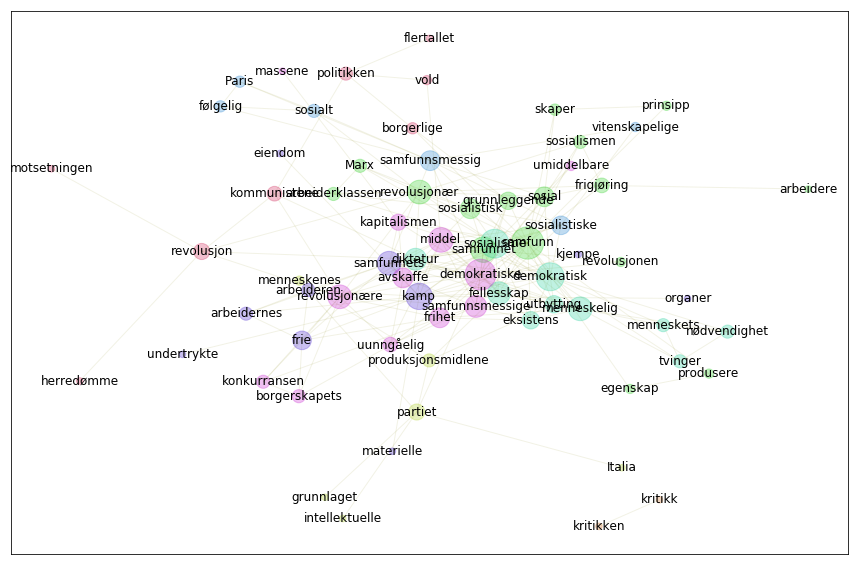

In [22]:
gnl.show_graph(G, spread = 0.5, fontsize=12)

In [29]:
bok = nb.pure_urn(bøker)[0]
nb.metadata(bok)

[[2013091905073,
  'Fretheim, Tor',
  1994,
  'Langsom trio',
  '',
  'Gyldendal',
  'fiction',
  'c31aa77141d27110ba2e737de3aa4a74',
  'nob',
  '']]

In [30]:
R = nb.navn(bok)
R

{'Abel': 15,
 'Akerselva': 3,
 'Allegro': 2,
 'Alm': 27,
 'Alms': 7,
 'Arnold': 21,
 'Arvika': 4,
 'Bad': 8,
 'Capri': 29,
 'Cocktail': 14,
 'Damm': 2,
 'Dem': 5,
 'Døden': 8,
 'Edith': 14,
 'Ei': 3,
 'Ekvator': 3,
 'Emils': 27,
 'Erik': 41,
 'Fretheim': 10,
 'Frogner': 2,
 'Fy': 3,
 'Gi': 2,
 'Grunerløkka': 3,
 'Gud': 2,
 'Gyldendal': 7,
 'Halvorsens': 4,
 'Hamburg': 3,
 'Hanshaugen': 3,
 'Hauke': 346,
 'Helgens': 3,
 'Herre': 5,
 'Hu': 3,
 'Husk': 5,
 'Hører': 5,
 'Ingensteder': 2,
 'Ja': 28,
 'Ja-': 2,
 'Jamen': 5,
 'Jassa': 4,
 'Jeg': 291,
 'Jenta': 3,
 'Jo': 11,
 'Kari': 2,
 'Karl': 9,
 'Kjenner': 2,
 'Kjære': 3,
 'Klemmt': 358,
 'Klemmts': 13,
 'Kommer': 3,
 'Kona': 3,
 'Laila': 49,
 'Lakkegata': 4,
 'Langsom': 4,
 'Leirfallsgata': 22,
 'Mamma': 5,
 'Marka': 7,
 'Markveien': 2,
 'Min': 3,
 'Måneskinnsvalsen': 5,
 'Nationaltheatret': 2,
 'Nesodden': 3,
 'Neste': 5,
 'Norge': 5,
 'Norway': 2,
 'Nøkken': 3,
 'Oslo': 8,
 'Paris': 3,
 'Per': 19,
 'Pernille': 7,
 'Piaf': 14,
 'Randi': 

In [31]:
RN = nb.check_navn(R, limit=2)

In [32]:
RN

{'Abel': 15,
 'Akerselva': 3,
 'Alm': 27,
 'Alms': 7,
 'Arnold': 21,
 'Arvika': 4,
 'Bad': 8,
 'Capri': 29,
 'Cocktail': 14,
 'Døden': 8,
 'Edith': 14,
 'Ei': 3,
 'Ekvator': 3,
 'Emils': 27,
 'Erik': 41,
 'Fretheim': 10,
 'Fy': 3,
 'Grunerløkka': 3,
 'Gyldendal': 7,
 'Halvorsens': 4,
 'Hamburg': 3,
 'Hanshaugen': 3,
 'Hauke': 346,
 'Helgens': 3,
 'Herre': 5,
 'Hu': 3,
 'Husk': 5,
 'Hører': 5,
 'Jamen': 5,
 'Jassa': 4,
 'Jeg': 291,
 'Jenta': 3,
 'Jo': 11,
 'Karl': 9,
 'Kjære': 3,
 'Klemmt': 358,
 'Klemmts': 13,
 'Kommer': 3,
 'Kona': 3,
 'Laila': 49,
 'Lakkegata': 4,
 'Langsom': 4,
 'Leirfallsgata': 22,
 'Mamma': 5,
 'Marka': 7,
 'Min': 3,
 'Måneskinnsvalsen': 5,
 'Nesodden': 3,
 'Neste': 5,
 'Norge': 5,
 'Nøkken': 3,
 'Oslo': 8,
 'Paris': 3,
 'Per': 19,
 'Pernille': 7,
 'Piaf': 14,
 'Randi': 119,
 'Sankt': 4,
 'Sara': 18,
 'Synes': 5,
 'Sånt': 3,
 'Theatercaféen': 33,
 'Thommessen': 10,
 'Torggata': 10,
 'Vakta': 5,
 'Veit': 7,
 'Vet': 7,
 'Visst': 5,
 'Vær': 3}

In [33]:
GR = nb.make_network_graph(bok, RN)

D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


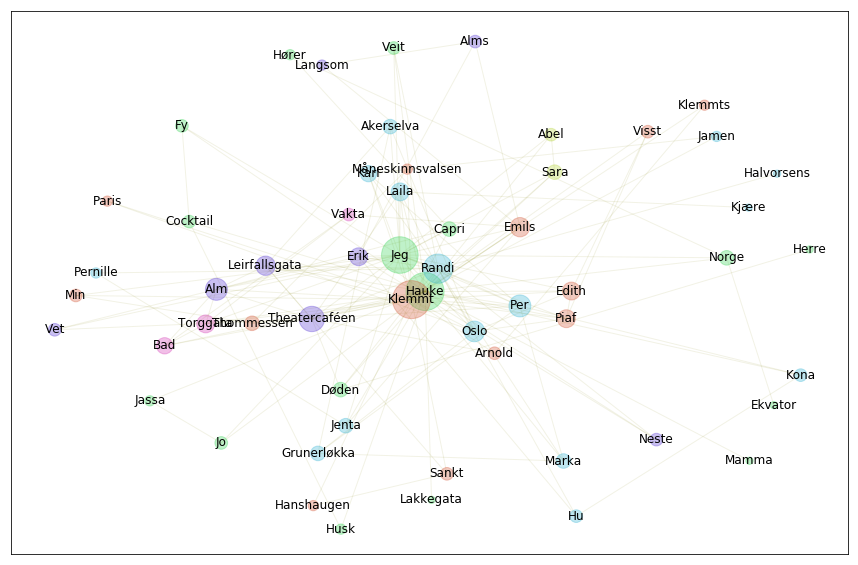

In [34]:
gnl.show_graph(GR,  spread = 1.2, fontsize=12)

In [35]:
nb.central_betweenness_characters(GR, 20)

[('Hauke', 0.3359126137210553),
 ('Klemmt', 0.29870416199961664),
 ('Jeg', 0.21437541715139113),
 ('Randi', 0.11878949693884756),
 ('Emils', 0.07369717043418343),
 ('Norge', 0.05203927025355598),
 ('Theatercaféen', 0.040133796578601784),
 ('Laila', 0.03688725415998144),
 ('Døden', 0.03571428571428571),
 ('Per', 0.027795092713923882),
 ('Oslo', 0.019674533619338814),
 ('Erik', 0.019338042909471477),
 ('Capri', 0.01809059987631416),
 ('Leirfallsgata', 0.016316753232337642),
 ('Alm', 0.013998917748917749),
 ('Torggata', 0.01300762729334158),
 ('Bad', 0.009402185116470825),
 ('Jenta', 0.008058597246908935),
 ('Karl', 0.00774582560296846),
 ('Kona', 0.00733147804576376)]

In [36]:
nb.central_characters(GR, 20)

[('Hauke', 0.4821428571428571),
 ('Klemmt', 0.4821428571428571),
 ('Jeg', 0.4464285714285714),
 ('Randi', 0.2857142857142857),
 ('Theatercaféen', 0.21428571428571427),
 ('Alm', 0.1607142857142857),
 ('Per', 0.1607142857142857),
 ('Oslo', 0.14285714285714285),
 ('Leirfallsgata', 0.125),
 ('Emils', 0.125),
 ('Erik', 0.10714285714285714),
 ('Torggata', 0.10714285714285714),
 ('Edith', 0.10714285714285714),
 ('Piaf', 0.10714285714285714),
 ('Laila', 0.10714285714285714),
 ('Bad', 0.08928571428571427),
 ('Karl', 0.08928571428571427),
 ('Sara', 0.07142857142857142),
 ('Akerselva', 0.07142857142857142),
 ('Grunerløkka', 0.07142857142857142)]